# Mobile Price Range Classification

## Reading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.xkcd()

In [2]:
%%time

train_dataframe = pd.read_csv('mobile-price-classification/train.csv')
test_dataframe = pd.read_csv('mobile-price-classification/test.csv')

CPU times: user 24.5 ms, sys: 4.89 ms, total: 29.4 ms
Wall time: 27.8 ms


In [3]:
train_dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.0,1.0,0,1,23,0.6,97.0,7,...,317.0,1805,2782.0,7,0,17.0,1,0.0,0.0,2
1,1614,0,1.9,0.0,8,1,55,0.3,188.0,3,...,860.0,1330,3914.0,17,13,13.0,1,0.0,0.0,3
2,1751,0,0.5,1.0,6,0,8,0.6,178.0,6,...,170.0,564,2969.0,8,6,17.0,0,0.0,1.0,2
3,697,0,2.7,1.0,5,1,20,0.4,173.0,2,...,478.0,1477,259.0,12,6,4.0,1,1.0,1.0,0
4,1343,0,2.4,1.0,5,1,14,0.9,81.0,8,...,1063.0,1205,462.0,18,7,11.0,1,1.0,1.0,0


In [4]:
test_dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1991,1,1.8,0,11,0,9,0.7,94,3,...,751,1377,1511,17,8,9,0,0,0,1
1,1695,0,0.5,1,6,1,46,0.7,200,3,...,1791,1898,446,16,13,15,1,1,1,1
2,584,1,1.7,1,1,1,19,0.4,199,4,...,919,1343,3996,12,9,17,1,1,1,3
3,1319,1,0.9,0,3,1,41,0.9,107,1,...,85,1152,2227,18,5,3,1,1,1,1
4,1724,0,2.0,1,2,1,57,0.5,177,3,...,1605,1924,2822,19,3,16,1,1,0,3


In [5]:
train_dataframe.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.00000,1600.000000,1599.000000,1598.000000,1600.000000,1600.00000,1600.000000,1600.000000,1598.000000,1600.000000,...,1599.000000,1600.000000,1599.000000,1600.000000,1600.000000,1599.000000,1600.000000,1599.000000,1599.000000,1600.000000
mean,1235.36375,0.495000,1.532833,0.508761,4.255000,0.51750,31.842500,0.504812,140.120150,4.563750,...,647.462164,1256.496250,2118.562852,12.316250,5.740000,10.986867,0.755625,0.500313,0.504690,1.502500
std,438.38647,0.500131,0.820965,0.500080,4.352938,0.49985,18.174478,0.287484,35.329037,2.292481,...,442.373116,433.266881,1084.196223,4.192371,4.331614,5.507006,0.429850,0.500156,0.500134,1.111087
min,501.00000,0.000000,0.500000,0.000000,0.000000,0.00000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.50000,0.000000,0.700000,0.000000,1.000000,0.00000,16.000000,0.200000,109.000000,3.000000,...,286.000000,880.500000,1205.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1227.50000,0.000000,1.500000,1.000000,3.000000,1.00000,31.000000,0.500000,141.000000,5.000000,...,571.000000,1248.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.75000,1.000000,2.300000,1.000000,7.000000,1.00000,47.000000,0.800000,170.000000,7.000000,...,948.000000,1642.250000,3061.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.00000,1.000000,3.000000,1.000000,19.000000,1.00000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1997.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 21 columns):
battery_power    1600 non-null int64
blue             1600 non-null int64
clock_speed      1599 non-null float64
dual_sim         1598 non-null float64
fc               1600 non-null int64
four_g           1600 non-null int64
int_memory       1600 non-null int64
m_dep            1600 non-null float64
mobile_wt        1598 non-null float64
n_cores          1600 non-null int64
pc               1600 non-null int64
px_height        1599 non-null float64
px_width         1600 non-null int64
ram              1599 non-null float64
sc_h             1600 non-null int64
sc_w             1600 non-null int64
talk_time        1599 non-null float64
three_g          1600 non-null int64
touch_screen     1599 non-null float64
wifi             1599 non-null float64
price_range      1600 non-null int64
dtypes: float64(9), int64(12)
memory usage: 262.6 KB


## Visualization

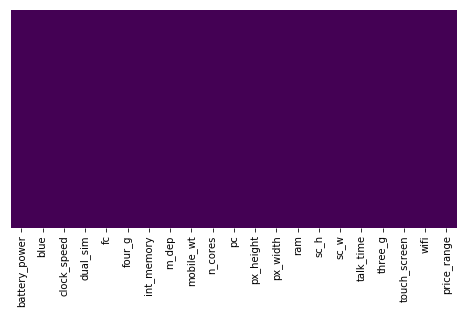

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(train_dataframe.head().isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [8]:
null_rows = train_dataframe[train_dataframe.isnull().any(axis=1)]

In [9]:
null_rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
11,1853,1,1.0,0.0,2,0,23,0.4,NaN,1,...,202.0,1951,2775.0,14,4,17.0,1,0.0,0.0,3
26,536,0,2.4,1.0,12,1,3,0.3,182.0,7,...,1386.0,1539,284.0,12,9,NaN,1,1.0,0.0,0
53,659,0,0.5,NaN,7,1,5,0.3,169.0,8,...,659.0,730,2190.0,16,10,16.0,1,1.0,0.0,1
81,504,1,1.0,0.0,8,0,14,0.5,189.0,7,...,NaN,1129,1607.0,15,0,10.0,1,1.0,1.0,0
113,888,0,2.6,1.0,2,1,33,0.4,198.0,2,...,327.0,1683,3407.0,12,1,20.0,1,NaN,0.0,3
149,1312,1,NaN,1.0,0,0,24,0.9,156.0,6,...,115.0,1791,3833.0,14,13,17.0,0,1.0,0.0,3
194,1358,1,0.5,0.0,11,1,36,0.3,155.0,4,...,1565.0,1858,NaN,9,4,4.0,1,1.0,0.0,3
287,1878,1,0.5,0.0,9,0,29,0.6,NaN,8,...,210.0,1026,1334.0,18,7,2.0,0,0.0,0.0,1
676,1546,1,1.6,NaN,2,1,27,0.7,124.0,2,...,1138.0,1491,267.0,12,10,16.0,1,1.0,0.0,0
781,1558,1,2.4,0.0,0,1,27,0.1,146.0,1,...,120.0,1409,3598.0,9,2,12.0,1,0.0,NaN,3


In [10]:
train_dataframe = train_dataframe.dropna(axis=0)
test_dataframe = test_dataframe.dropna(axis=0)

In [11]:
train_dataframe.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.010453,0.011480,-0.039799,0.024956,0.036644,-0.013368,0.052885,0.018274,-0.018401,...,0.028872,0.014701,-0.017437,-0.025795,-0.018557,0.054914,0.000804,-0.005856,-0.013969,0.194958
blue,0.010453,1.000000,0.024661,0.032950,-0.006366,0.010497,0.027977,0.005035,0.010308,0.037728,...,-0.008836,-0.036610,0.022580,0.010671,-0.003374,0.005207,-0.049591,-0.000016,-0.022471,0.019865
clock_speed,0.011480,0.024661,1.000000,-0.008056,-0.003257,-0.041655,0.019364,0.001902,0.008321,0.005208,...,-0.033541,-0.008078,0.013214,-0.040504,-0.026422,-0.011533,-0.055647,0.020056,-0.021800,-0.002224
dual_sim,-0.039799,0.032950,-0.008056,1.000000,-0.039970,-0.014488,-0.013906,-0.032694,-0.010165,-0.024438,...,-0.004023,0.027964,0.045279,-0.016833,-0.026456,-0.040397,-0.022916,-0.033945,0.021128,0.024936
fc,0.024956,-0.006366,-0.003257,-0.039970,1.000000,-0.018285,-0.027585,-0.007756,0.014170,0.014870,...,-0.013122,-0.004676,0.013278,-0.012292,-0.017812,-0.012876,-0.000458,-0.029562,0.054002,0.015251
four_g,0.036644,0.010497,-0.041655,-0.014488,-0.018285,1.000000,0.002290,0.000703,-0.015049,-0.024317,...,0.006731,0.035322,0.010653,0.028209,0.041283,-0.034403,0.588788,0.001301,-0.029421,0.023794
int_memory,-0.013368,0.027977,0.019364,-0.013906,-0.027585,0.002290,1.000000,0.006115,-0.028517,-0.033916,...,0.011465,-0.006253,0.047437,0.025973,0.028253,0.006011,-0.013386,-0.053427,0.001491,0.057171
m_dep,0.052885,0.005035,0.001902,-0.032694,-0.007756,0.000703,0.006115,1.000000,0.021108,-0.000115,...,0.022176,0.027334,-0.010934,-0.007108,0.009006,0.040320,-0.004545,-0.004786,-0.023420,0.006878
mobile_wt,0.018274,0.010308,0.008321,-0.010165,0.014170,-0.015049,-0.028517,0.021108,1.000000,-0.016322,...,-0.031850,-0.007343,-0.014193,-0.039766,-0.043335,-0.017258,-0.001686,-0.018890,-0.010415,-0.039260
n_cores,-0.018401,0.037728,0.005208,-0.024438,0.014870,-0.024317,-0.033916,-0.000115,-0.016322,1.000000,...,0.002446,0.040134,0.005646,-0.001895,0.035117,0.002412,-0.010095,0.029991,-0.023746,0.008146


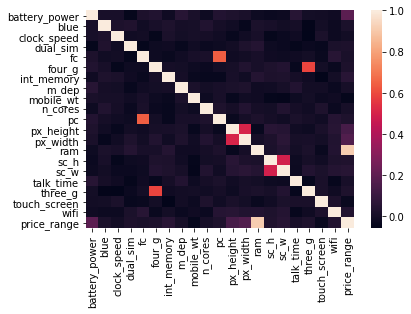

In [12]:
sns.heatmap(train_dataframe.corr())
plt.show()

## Type Conversion

In [13]:
decode_map = {0: "Inexpensive", 1:"Low", 2: "Moderate", 3: "Expensive"}
def decode_price_range(label):
    return decode_map[int(label)]

train_dataframe.price_range = train_dataframe.price_range.apply(lambda x: decode_price_range(x))
test_dataframe.price_range = test_dataframe.price_range.apply(lambda x: decode_price_range(x))

In [14]:
train_dataframe['price_range'].unique()

array(['Moderate', 'Expensive', 'Inexpensive', 'Low'], dtype=object)

In [15]:
train_dataframe.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.0,1.0,0,1,23,0.6,97.0,7,...,317.0,1805,2782.0,7,0,17.0,1,0.0,0.0,Moderate
1,1614,0,1.9,0.0,8,1,55,0.3,188.0,3,...,860.0,1330,3914.0,17,13,13.0,1,0.0,0.0,Expensive
2,1751,0,0.5,1.0,6,0,8,0.6,178.0,6,...,170.0,564,2969.0,8,6,17.0,0,0.0,1.0,Moderate
3,697,0,2.7,1.0,5,1,20,0.4,173.0,2,...,478.0,1477,259.0,12,6,4.0,1,1.0,1.0,Inexpensive
4,1343,0,2.4,1.0,5,1,14,0.9,81.0,8,...,1063.0,1205,462.0,18,7,11.0,1,1.0,1.0,Inexpensive


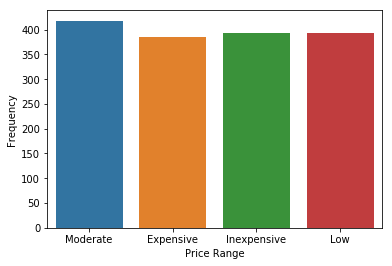

In [16]:
sns.countplot(train_dataframe['price_range'])
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

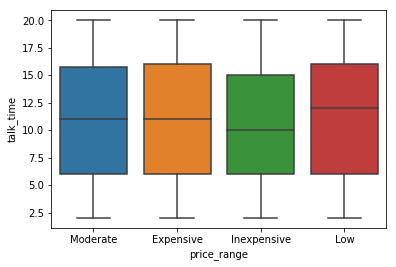

In [17]:
sns.boxplot(train_dataframe['price_range'], train_dataframe['talk_time'])
plt.show()

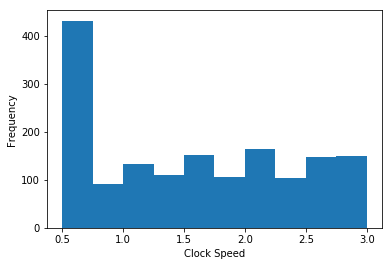

In [18]:
plt.hist(train_dataframe['clock_speed'])
plt.xlabel('Clock Speed')
plt.ylabel('Frequency')
plt.show()

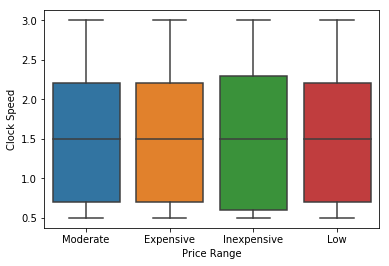

In [19]:
sns.boxplot(train_dataframe['price_range'], train_dataframe['clock_speed'])
plt.xlabel('Price Range')
plt.ylabel('Clock Speed')
plt.show()

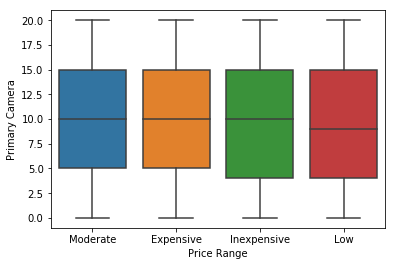

In [20]:
sns.boxplot(train_dataframe['price_range'], train_dataframe['pc'])
plt.xlabel('Price Range')
plt.ylabel('Primary Camera')
plt.show()

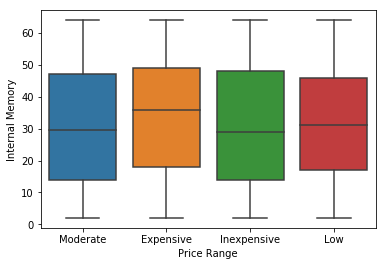

In [21]:
sns.boxplot(train_dataframe['price_range'], train_dataframe['int_memory'])
plt.xlabel('Price Range')
plt.ylabel('Internal Memory')
plt.show()

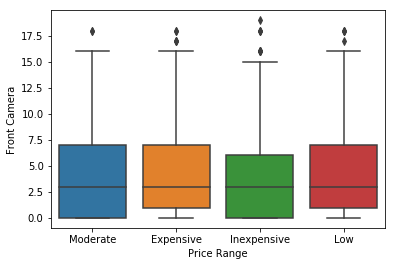

In [22]:
sns.boxplot(train_dataframe['price_range'], train_dataframe['fc'])
plt.xlabel('Price Range')
plt.ylabel('Front Camera')
plt.show()

Text(0,0.5,'Frequency')

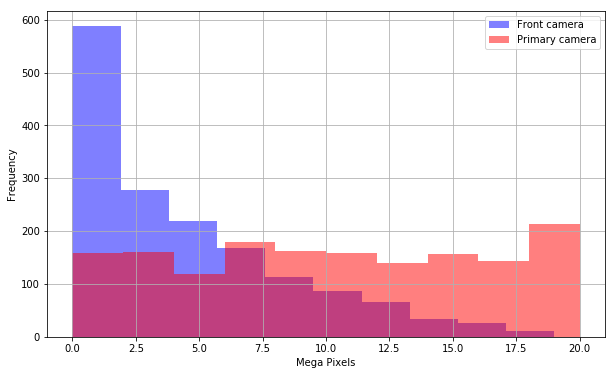

In [23]:
plt.figure(figsize=(10,6))
train_dataframe['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train_dataframe['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('Mega Pixels')
plt.ylabel('Frequency')

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
def plot_cm(cm, score):
    plt.figure(figsize=(9,9))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax=ax)
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(labels.unique())
    ax.yaxis.set_ticklabels(labels.unique())
    ax.set_title(all_sample_title, size = 15)
    plt.show()

In [26]:
train_features = train_dataframe.drop('price_range',axis=1)
labels = train_dataframe['price_range']

test_features = test_dataframe.drop('price_range',axis=1)
test_labels = test_dataframe['price_range']

scaler = StandardScaler()
scaler.fit(train_features)

x_train = scaler.transform(train_features)
x_test = scaler.transform(test_features)

y_train = labels
y_test = test_labels

/home/amey/projects/college/dmw/Mobile Classification/env/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/amey/projects/college/dmw/Mobile Classification/env/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/home/amey/projects/college/dmw/Mobile Classification/env/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [27]:
print x_train[:3]
print x_train.shape
print type(x_train)

[[-1.05867378 -0.98749951 -0.65033581  0.98130676 -0.97648622  0.96659535
  -0.48949413  0.32961929 -1.21712196  1.06466891  0.1903069  -0.74851533
   1.26921166  0.61294947 -1.26515747 -1.3249373   1.09468797  0.56911928
  -0.99874293 -1.01393354]
 [ 0.86440906 -0.98749951  0.44645917 -1.01904933  0.86228576  0.96659535
   1.26973884 -0.71300936  1.35891152 -0.68321294  1.18402768  0.48116401
   0.17265174  1.65857815  1.11684416  1.67664687  0.36763957  0.56911928
  -0.99874293 -1.01393354]
 [ 1.17730971 -0.98749951 -1.25966636  0.98130676  0.40259276 -1.03455908
  -1.31413458  0.32961929  1.07583092  0.62769845  1.68088806 -1.08141194
  -1.59569541  0.78568142 -1.0269573   0.06040924  1.09468797 -1.75710091
  -0.99874293  0.98625794]]
(1590, 20)
<type 'numpy.ndarray'>


In [28]:
accuracies = dict()

# Logistic Regression

/home/amey/projects/college/dmw/Mobile Classification/env/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/amey/projects/college/dmw/Mobile Classification/env/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Logistic Regression:


Confusion Matrix:



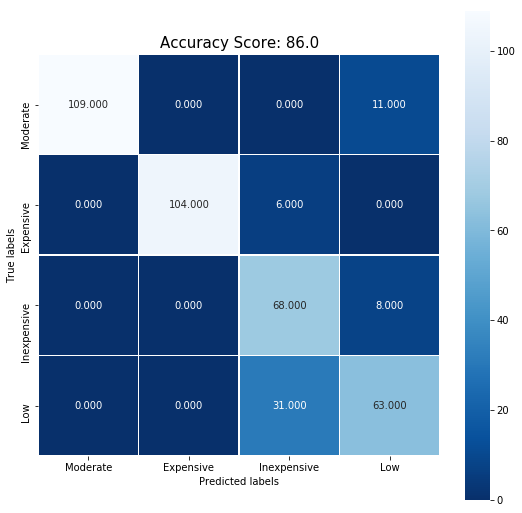

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)

accuracies['logistic_regression'] = accuracy_score(y_test_pred, y_test)*100

logistic_score = accuracy_score(y_test_pred, y_test)*100
logistic_cm = confusion_matrix(y_test_pred, y_test)
print("\nLogistic Regression:\n")
print("\nConfusion Matrix:\n")
plot_cm(logistic_cm, logistic_score)

In [30]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
              precision    recall  f1-score   support

   Expensive       1.00      0.91      0.95       120
 Inexpensive       1.00      0.95      0.97       110
         Low       0.65      0.89      0.75        76
    Moderate       0.77      0.67      0.72        94

   micro avg       0.86      0.86      0.86       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.88      0.86      0.86       400



## K-Nearest Neighbours

In [31]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')


K-Nearest Neighbours:


Confusion Matrix:



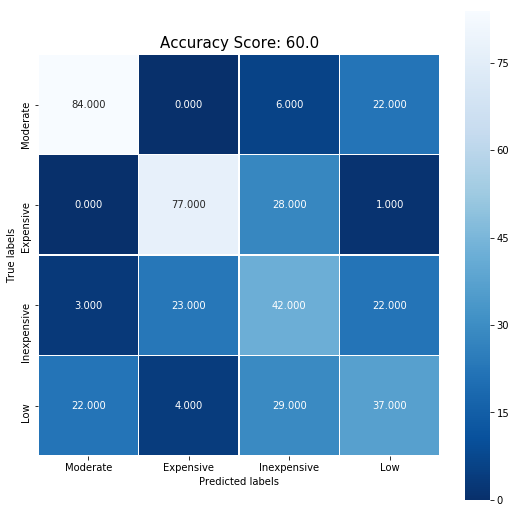

In [32]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

accuracies['KNN'] = accuracy_score(y_test_pred,y_test)*100


knn_score = accuracy_score(y_test_pred, y_test)*100
knn_cm = confusion_matrix(y_test_pred, y_test)
print("\nK-Nearest Neighbours:\n")
print("\nConfusion Matrix:\n")
plot_cm(knn_cm, knn_score)

In [33]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
              precision    recall  f1-score   support

   Expensive       0.77      0.75      0.76       112
 Inexpensive       0.74      0.73      0.73       106
         Low       0.40      0.47      0.43        90
    Moderate       0.45      0.40      0.43        92

   micro avg       0.60      0.60      0.60       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.61      0.60      0.60       400



In [34]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

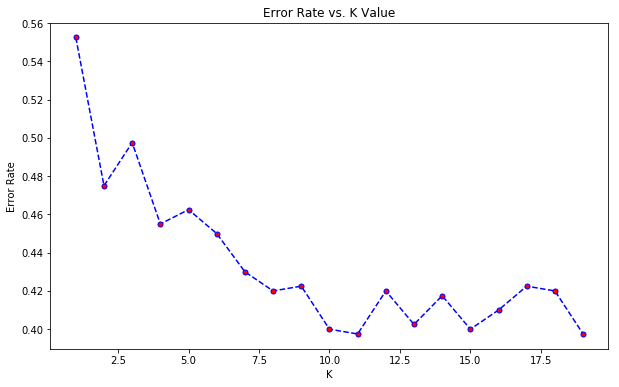

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## Decision Tree

In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Decision Tree:


Confusion Matrix:



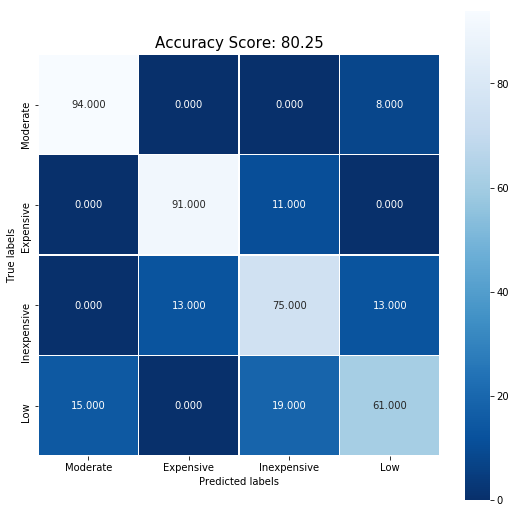

In [37]:
y_test_pred = dtree.predict(x_test)

accuracies['Decision Tree'] = accuracy_score(y_test_pred,y_test)*100

dtree_score = accuracy_score(y_test_pred, y_test)*100
dtree_cm = confusion_matrix(y_test_pred, y_test)
print("\nDecision Tree:\n")
print("\nConfusion Matrix:\n")
plot_cm(dtree_cm, dtree_score)

In [38]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
              precision    recall  f1-score   support

   Expensive       0.86      0.92      0.89       102
 Inexpensive       0.88      0.89      0.88       102
         Low       0.71      0.74      0.73       101
    Moderate       0.74      0.64      0.69        95

   micro avg       0.80      0.80      0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [39]:
columns = train_dataframe.columns
columns = columns.delete(-1)

print(columns)

Index([u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc',
       u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi'],
      dtype='object')


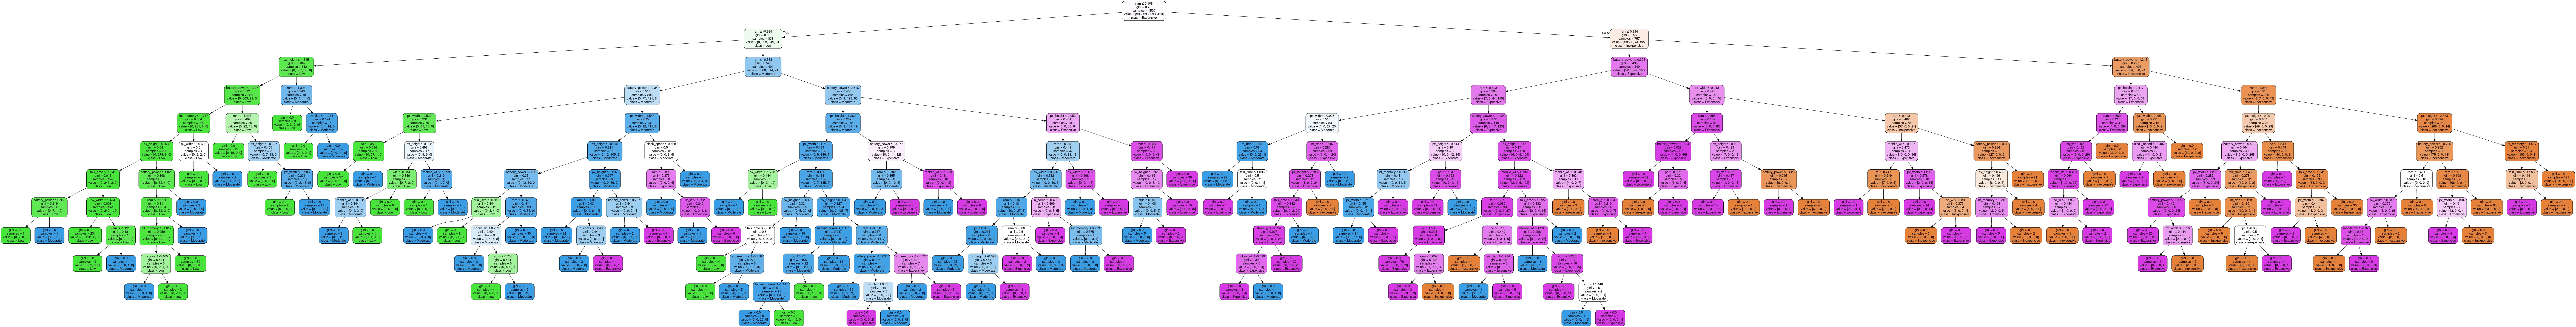

In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = list(columns),
                class_names=['Inexpensive','Low', 'Moderate', 'Expensive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_jpg('decision_tree.jpg')
Image(graph.create_jpg())

## Random Forest


Random Forest:


Confusion Matrix:



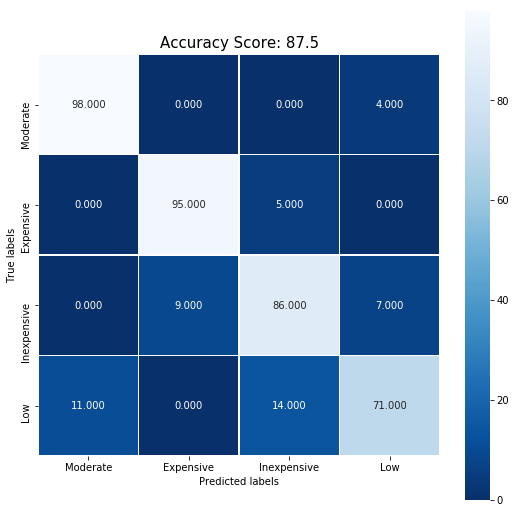

In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

y_train_pred = dtree.predict(x_train)
y_test_pred = rfc.predict(x_test)

accuracies['Random Forest'] = accuracy_score(y_test_pred,y_test)*100


rfc_score = accuracy_score(y_test_pred, y_test)*100
rfc_cm = confusion_matrix(y_test_pred, y_test)

print("\nRandom Forest:\n")
print("\nConfusion Matrix:\n")
plot_cm(rfc_cm, rfc_score)

In [42]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
              precision    recall  f1-score   support

   Expensive       0.90      0.96      0.93       102
 Inexpensive       0.91      0.95      0.93       100
         Low       0.82      0.84      0.83       102
    Moderate       0.87      0.74      0.80        96

   micro avg       0.88      0.88      0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



## SVM


State Vector Machine:


Confusion Matrix:



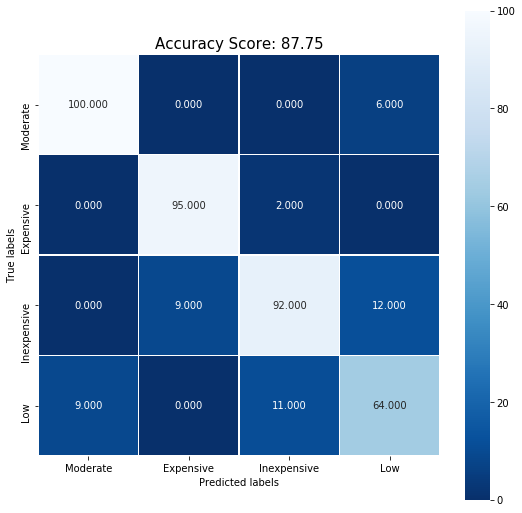

In [43]:
#SVM
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_train_pred = svc_model.predict(x_train)
y_test_pred = svc_model.predict(x_test)

accuracies['SVM'] = accuracy_score(y_test_pred,y_test)*100

svc_score = accuracy_score(y_test_pred, y_test)*100
svc_cm = confusion_matrix(y_test_pred, y_test)

print("\nState Vector Machine:\n")
print("\nConfusion Matrix:\n")
plot_cm(svc_cm, svc_score)

In [44]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
              precision    recall  f1-score   support

   Expensive       0.92      0.94      0.93       106
 Inexpensive       0.91      0.98      0.95        97
         Low       0.88      0.81      0.84       113
    Moderate       0.78      0.76      0.77        84

   micro avg       0.88      0.88      0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



## Gaussian Naive Bayes


Naive Bayes Classifier:


Confusion Matrix:



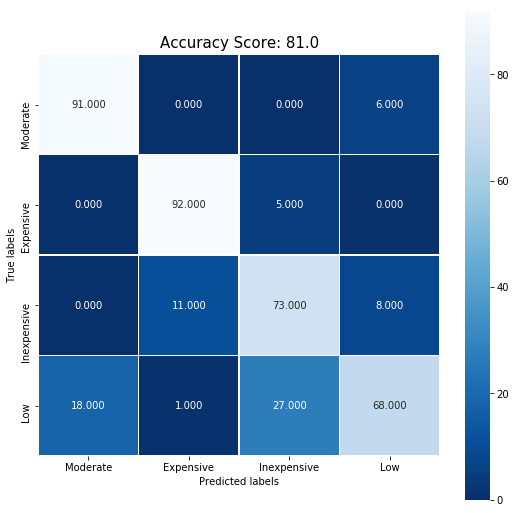

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)

y_train_pred = gnb_model.predict(x_train)
y_test_pred = gnb_model.predict(x_test)

accuracies['Gaussian Naive Bayes'] = accuracy_score(y_test_pred,y_test)*100


gnb_score = accuracy_score(y_test_pred, y_test)*100
gnb_cm = confusion_matrix(y_test_pred, y_test)

print("\nNaive Bayes Classifier:\n")
print("\nConfusion Matrix:\n")
plot_cm(gnb_cm, gnb_score)

In [46]:
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))


Classification Report:
              precision    recall  f1-score   support

   Expensive       0.83      0.94      0.88        97
 Inexpensive       0.88      0.95      0.92        97
         Low       0.70      0.79      0.74        92
    Moderate       0.83      0.60      0.69       114

   micro avg       0.81      0.81      0.81       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.81      0.81      0.80       400



## Plotting Accuracies

In [47]:
accuracies

{'Decision Tree': 80.25,
 'Gaussian Naive Bayes': 81.0,
 'KNN': 60.0,
 'Random Forest': 87.5,
 'SVM': 87.75,
 'logistic_regression': 86.0}

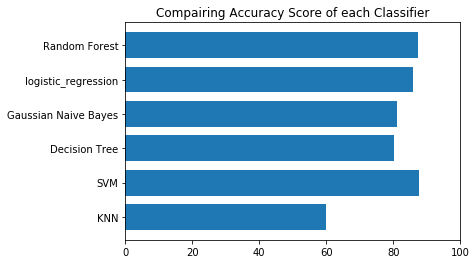

In [48]:
plt.barh(accuracies.keys(), accuracies.values(), 0.75, align='center')
plt.xlim(0, 100)
plt.title("Compairing Accuracy Score of each Classifier")
plt.show()